## Contents
### 1. Importing libraries and data
### 2. Subsetting and wrangling
### 3. Decomposition time series analysis
### 4. Testing for stationarity

### 1. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm

import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# configure API key 

quandl.ApiConfig.api_key = '27HJX6qGUi3yhseMNt5A'

In [3]:
# importing 

data = quandl.get('FRED/WAPOP')

In [4]:
data.head()

,Value
Date,
1900-01-01,523.0
1901-01-01,583.0
1902-01-01,651.0
1903-01-01,719.0
1904-01-01,782.0


In [5]:
data.shape

(122, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

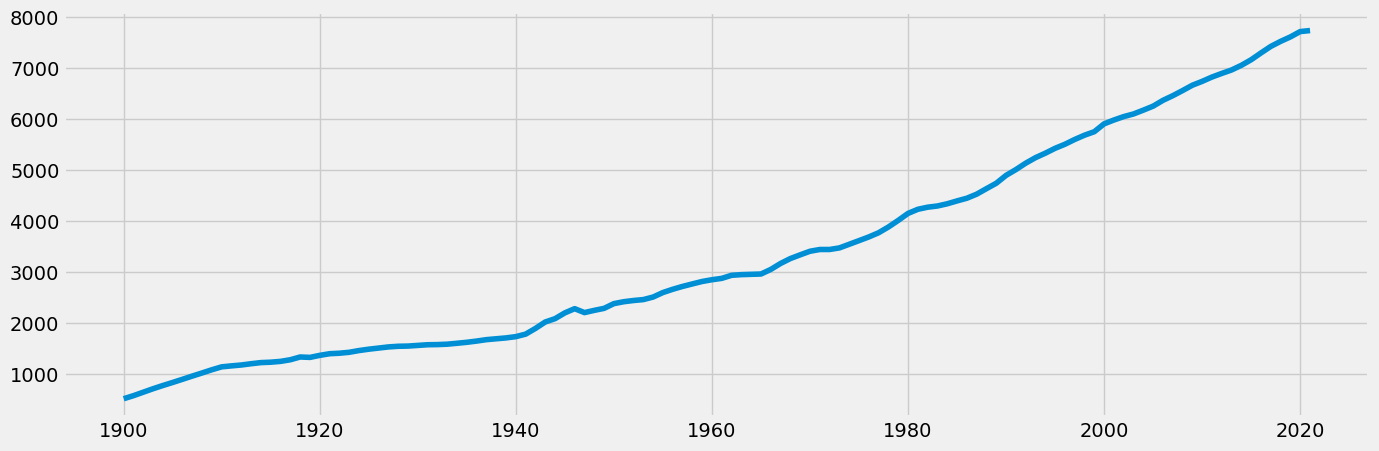

In [8]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)

plt.plot(data)

## 2. Subsetting and wrangling

In [9]:
# reset index

data_2 = data.reset_index()

In [10]:
data_2.head()

,Date,Value
0,1900-01-01,523.0
1,1901-01-01,583.0
2,1902-01-01,651.0
3,1903-01-01,719.0
4,1904-01-01,782.0


In [11]:
data_sub = data_2.loc[(data_2['Date'] >= '2000-01-01') & (data_2['Date'] < '2015-05-01')]

### Q3. Project analysis is taking place in may 2015, so narrowed the data to represent the year 2000 to current month

In [12]:
data_sub.shape

(16, 2)

In [13]:
data_sub.head()

,Date,Value
100,2000-01-01,5910.512
101,2001-01-01,5985.722
102,2002-01-01,6052.349
103,2003-01-01,6104.115
104,2004-01-01,6178.645


In [14]:
# set the date column as index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date'])
data_sub = data_sub.set_index('datetime')
data_sub.drop(['Date'], axis=1, inplace=True)
data_sub.head()

,Value
datetime,
2000-01-01,5910.512
2001-01-01,5985.722
2002-01-01,6052.349
2003-01-01,6104.115
2004-01-01,6178.645


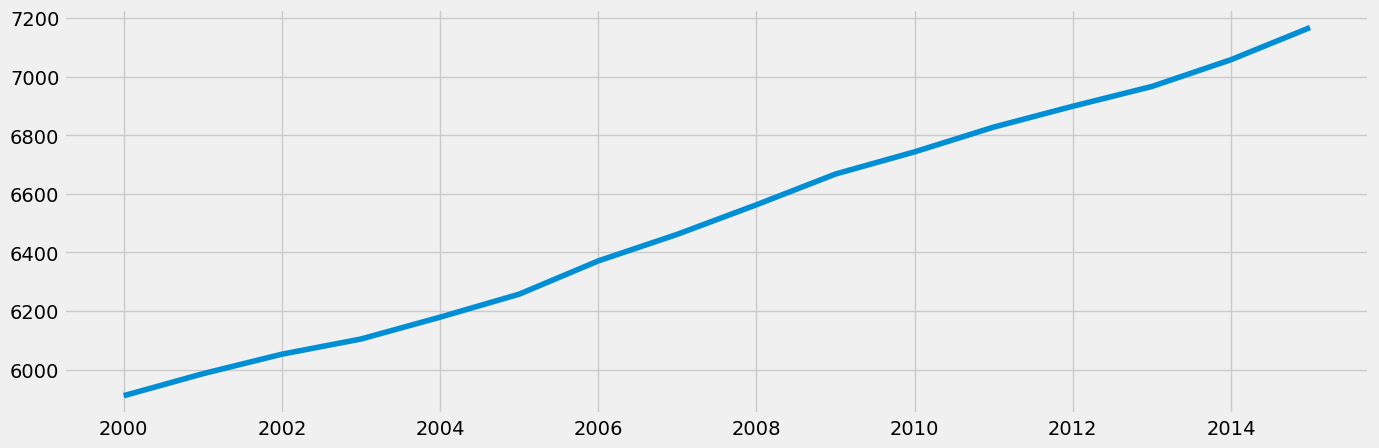

In [15]:
# plot data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [16]:
# checkf or missing values

data_sub.isnull().sum() 

Value    0
dtype: int64

In [17]:
#check for dups

dups = data_sub.duplicated()
dups.sum()

0

### 3. Decomposition time series

In [18]:
# decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [19]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

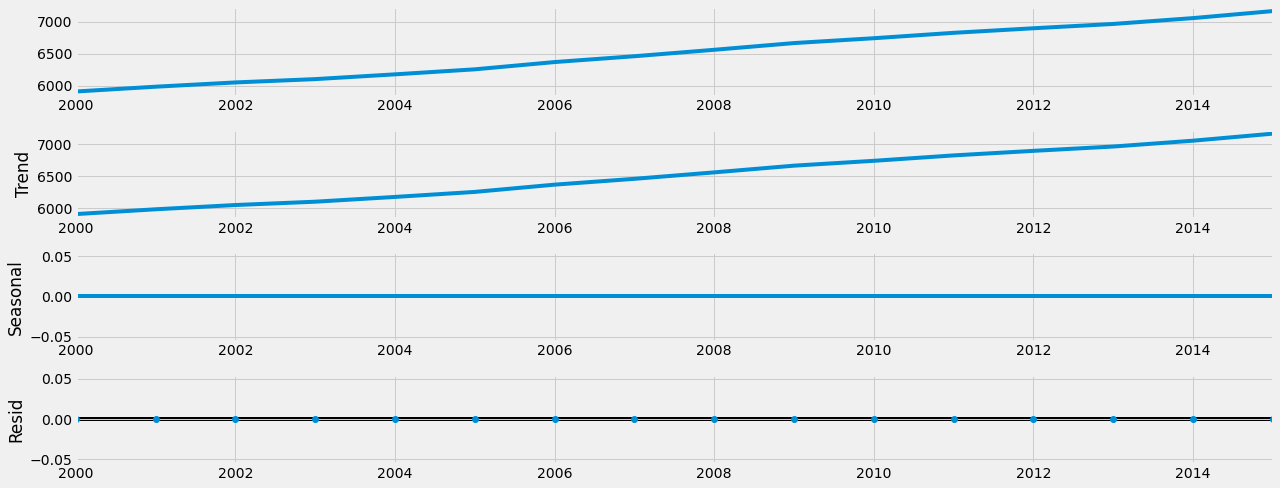

In [20]:
# plot the separate components

decomposition.plot()
plt.show()

### Q5. There is a clear upward tredn in the data as time goes on, but there is no seasonality or noise in the data. 

### 4. Testing for stationarity

In [21]:
# Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 21.179162
p-value                         1.000000
Number of Lags Used             6.000000
Number of Observations Used     9.000000
Critical Value (1%)            -4.473135
Critical Value (5%)            -3.289881
Critical Value (10%)           -2.772382
dtype: float64


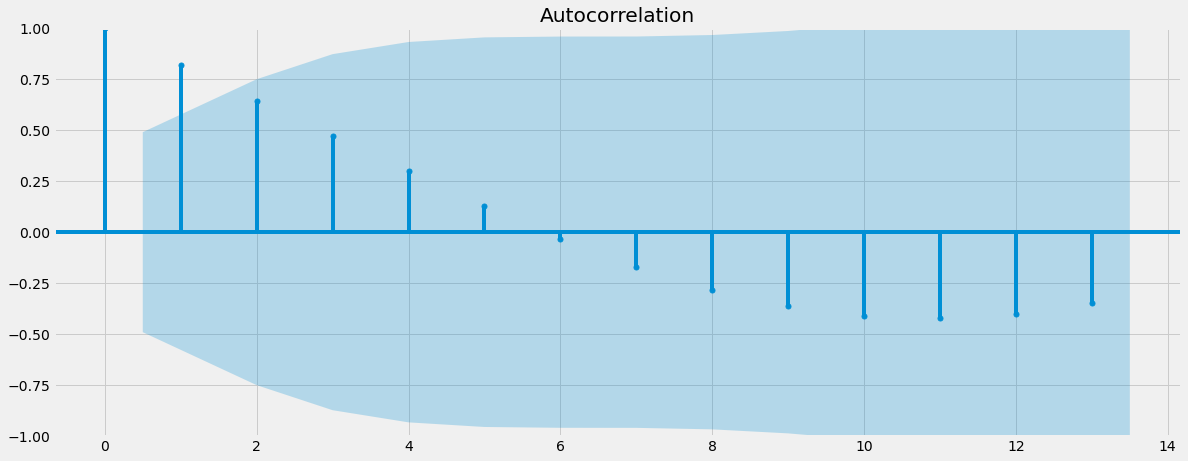

In [22]:
# check autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_sub)
plt.show()

### Due to there being only 2 lines above the confidence interval we can conclude that the data does not need to be standardized further and thus is stationary.